# Pandas

- Series - 1D Array
- Data Frame - 2D Array

## 1. Intro to Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
my_list1 = ['a', 'b', 'c']
my_list2 = [10, 20, 30]
my_array1 = np.array([10,20,30])
my_dict1 = {'a':10, 'b':20, 'c':30}

In [3]:
#Cara membuat series dari list
my_series = pd.Series(data = my_list1)
my_series

#hasilnya, kanan value kiri  index

0    a
1    b
2    c
dtype: object

In [4]:
#Cara membuat series dari array dan bisa direname indexnya dari value list
my_series2 = pd.Series(data = my_array1, index = my_list1)
my_series2

a    10
b    20
c    30
dtype: int32

In [5]:
#Cara membuat series dari list dan bisa direname indexnya dicustom
#kalo custom, input valuenya harus sesuai len
my_series3 = pd.Series(my_list2, index=[7,8,9])
my_series3

7    10
8    20
9    30
dtype: int64

In [6]:
#Cara membuat series dari array dan bisa direname indexnya dari value array
my_series4 = pd.Series(my_list2, index = my_array1)
my_series4

10    10
20    20
30    30
dtype: int64

In [7]:
#Cara membuat series dari dictionary dan indexnya gabisa diubah karena dict sudah berpasangan
my_series5 = pd.Series(my_dict1, dtype = 'float', name = 'series5')
my_series5

#dtype : untuk mengontrol data type pada series
#name : untuk dijadikan nama column di dataframe

a    10.0
b    20.0
c    30.0
Name: series5, dtype: float64

In [8]:
#cara melihat value
my_series5.values


array([10., 20., 30.])

In [9]:
# #cara melihat index
my_series5.index


Index(['a', 'b', 'c'], dtype='object')

In [10]:
##mengubah series menjadi list
display(my_series5.tolist())
display(type(my_series5.tolist()))

[10.0, 20.0, 30.0]

list

## 1.1 Indexing

In [11]:
my_series6 = pd.Series(data=[1,2,3,4], index = 'Bandung Jakarta Surabaya Jogja'.split())
my_series6

#indexnya bisa berupa string

Bandung     1
Jakarta     2
Surabaya    3
Jogja       4
dtype: int64

In [12]:
my_series6['Surabaya']

3

In [13]:
my_series6['Bandung':'Surabaya']

Bandung     1
Jakarta     2
Surabaya    3
dtype: int64

In [14]:
my_series6[0:2]

Bandung    1
Jakarta    2
dtype: int64

In [15]:
my_series7 = pd.Series([0,1,2,3,4], index = 'Jogja Bandung Jakarta Serang Surabaya'.split(), name='series7')
my_series7

Jogja       0
Bandung     1
Jakarta     2
Serang      3
Surabaya    4
Name: series7, dtype: int64

## 1.2 Operations

In [16]:
## penjumlahan series yg beda element, akan bergabung tapi yg value gaada jadi Nan
##jika ada dua element dan indexnya sama, maka akan menjadi penjumlahan matrix

my_series6 + my_series7

Bandung     2.0
Jakarta     4.0
Jogja       4.0
Serang      NaN
Surabaya    7.0
dtype: float64

### object < float < int

In [17]:
## #bentuk dasar dari Nan adalah float
# perbedaan Nan ~ null = hampir sama, tidak ada kehadiran value
# 0 = valuenya ada yaitu nol

In [18]:
#mengeck tipe data nan
type(np.nan)

float

In [19]:
##untuk memperbaiki nan di series diatas yaitu menambah value di series serang
#penjumlahan bukan sesuai urutan index, tapi sesuai nama index

my_series6['Serang'] = 0
my_series8 = my_series6 + my_series7

my_series8
#hasilnya jadi 3 karena 3 + 0

Bandung     2
Jakarta     4
Jogja       4
Serang      3
Surabaya    7
dtype: int64

In [20]:
##kalo operation dari numpy, series akan dijadikan argumen.
#contoh: 
np.log(my_series8)

Bandung     0.693147
Jakarta     1.386294
Jogja       1.386294
Serang      1.098612
Surabaya    1.945910
dtype: float64

## 1.3 s.duplicated()

In [21]:
#mencari element yg valuenya duplicated, kalo True berarti udah pernah ditemui sebelumnya
my_series8.duplicated()

Bandung     False
Jakarta     False
Jogja        True
Serang      False
Surabaya    False
dtype: bool

In [22]:
my_series8['Jogja']

4

In [23]:
##pake conditional statement
my_series8[my_series8.duplicated()]

#salah satu cara untuk menghapus duplicated data

Jogja    4
dtype: int64

In [24]:
#mengubah name series
my_series8.name = 'series8'
my_series8

Bandung     2
Jakarta     4
Jogja       4
Serang      3
Surabaya    7
Name: series8, dtype: int64

In [25]:
##mengubah value series menjadi array

array_value = np.array(my_series8.values.tolist())
display(array_value)

##mengubah index series menjadi array
array_index = np.array(my_series8.index.tolist())
display(array_index)

array([2, 4, 4, 3, 7])

array(['Bandung', 'Jakarta', 'Jogja', 'Serang', 'Surabaya'], dtype='<U8')

## 2. DataFrame

In [26]:
#bisa bikin DataFrame dari array

In [27]:
my_array2 = np.random.randint(1,10, [3,4])
my_dict2 ={'a':[1,2,3], 'b': [4,5,6], 'c':[7,8,9]}

In [28]:
#buat DataFrame dari series

In [29]:
## membuat dataframe kosong, lalu diisi
df1 = pd.DataFrame()
df1['series7'] = my_series7
df1['series8'] = my_series8

df1

,series7,series8
Jogja,0,4
Bandung,1,2
Jakarta,2,4
Serang,3,3
Surabaya,4,7


In [30]:
#membuat dataframe dari 2D array dan mengganti nama column
df2 = pd.DataFrame(my_array2, columns = 'a b c d'.split())
df2

,a,b,c,d
0,1,7,1,5
1,7,4,3,6
2,8,6,4,8


In [31]:
#membuat dataframe dari dict dan gabisa ganti nama column
my_dict2

#key = akan jadi column
#value = akan jadi row dan iterable

{'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]}

In [32]:
df3 = pd.DataFrame(my_dict2)
df3

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [33]:
my_dict1

{'a': 10, 'b': 20, 'c': 30}

In [34]:
#membuat dataframe dari satu dict, tapi dikasi indexnya berupa list
df4 = pd.DataFrame(my_dict1, index=[0])
df4

,a,b,c
0,10,20,30


In [35]:
#penjualan toko elektronik dari bulan ke bulan dengan array 2D

sales = pd.DataFrame(data = np.array([[10,20,30], [20,30,20], [40,50,20]]),
                    index=['screen', 'mouse', 'vga'], 
                     columns=['Jan', 'Feb', 'Mar'])
display(sales)

#mengecek data type dari sales
display(type(sales))

,Jan,Feb,Mar
screen,10,20,30
mouse,20,30,20
vga,40,50,20


pandas.core.frame.DataFrame

In [36]:
#mengetahui jumlah penjualan di bulan januari

#akan meturn value series
sales_jan_series = sales['Jan']
display(sales_jan_series)

#mengecek data type dari sales januari
display(type(sales_jan_series))

screen    10
mouse     20
vga       40
Name: Jan, dtype: int32

pandas.core.series.Series

In [37]:
sales_jan_df = sales[['Jan']]
display(sales_jan_df)
display(type(sales_jan_df))

,Jan
screen,10
mouse,20
vga,40


pandas.core.frame.DataFrame

In [38]:
##memanggil DataFrame
## kalo panggil satu column, bisa pake single bracket tapi hasilnya value saja
## mengambil column lebih dari satu, pake double square bracket 

In [39]:
sales_janfeb_df = sales[['Jan','Feb']]
display(sales_janfeb_df)
display(type(sales_janfeb_df))

,Jan,Feb
screen,10,20
mouse,20,30
vga,40,50


pandas.core.frame.DataFrame

### slicing

In [40]:
sales_janfeb_df[0::2]

,Jan,Feb
screen,10,20
vga,40,50


In [41]:
sales_janfeb_df[['Jan']][0:1]

,Jan
screen,10


### df.isin()

In [42]:
#mencari value dan mengembalikan dengan boolean
sales.isin([10,50])

,Jan,Feb,Mar
screen,True,False,False
mouse,False,False,False
vga,False,True,False


### Delete Column

In [43]:
#menghapus suatu kolom keseluruhan
# del sales['Total']
# display(sales)


### 2.1  df.head()

In [44]:
# .head() defaultnya menampilkan 5 data teratas, tapi bisa dicustom
sales_janfeb_df.head(2)

,Jan,Feb
screen,10,20
mouse,20,30


### 2.2 df.tail()

In [45]:
# .tail() defaultnya menampilkan 5 data terbawah, tapi bisa dicustom
sales_janfeb_df.tail(1)

,Jan,Feb
vga,40,50


### 2.3 Adding column(s)

In [46]:
## menambah satu kolom atau lebih

sales

,Jan,Feb,Mar
screen,10,20,30
mouse,20,30,20
vga,40,50,20


In [47]:
#membuat kolom baru bernama total
sales['total'] = sales['Jan'] + sales['Feb'] + sales['Mar']
sales

,Jan,Feb,Mar,total
screen,10,20,30,60
mouse,20,30,20,70
vga,40,50,20,110


In [48]:
#membuat kolom persentasi
sales['percent'] = round(sales['total']/np.sum(sales['total'])*100,2)
sales

,Jan,Feb,Mar,total,percent
screen,10,20,30,60,25.00
mouse,20,30,20,70,29.17
vga,40,50,20,110,45.83


In [49]:
sales['percent'].sum()

100.0

In [50]:
#menambah kolom baru dari value baru
sales['Apr'] = [90,80,60]
display(sales)

,Jan,Feb,Mar,total,percent,Apr
screen,10,20,30,60,25.00,90
mouse,20,30,20,70,29.17,80
vga,40,50,20,110,45.83,60


### 2.4 df.columns

In [51]:
#untuk mengeset berapa banyak column yg akan ditampilkan

#a|b|c|d|e .......|x|y|z
##high dimensionality = kolomnya buanyaak bgt

In [52]:
sales_columns = list(sales.columns) #bisa dijadiin list
display(sales_columns)

['Jan', 'Feb', 'Mar', 'total', 'percent', 'Apr']

In [53]:
for i in sales_columns:
    print(i)

Jan
Feb
Mar
total
percent
Apr


### 2.5 df.index

In [54]:
sales.index

Index(['screen', 'mouse', 'vga'], dtype='object')

### 2.6 df.describe()

In [55]:
#akan mendapatkan summary statistic (mean, count, min,max, quantil1-3)

In [56]:
np.random.seed(25)

a = np.random.randint(1000,2000,(5,12))
df4 = pd.DataFrame(a, columns = np.arange(1,13), index = 'screen mouse speaker keyboard vga'.split())
#jumlah indexnya sesuai dengan baris

df4

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752,1678


In [57]:
df4.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1277.400000,1613.000000,1705.400000,1335.800000,1693.200000,1461.200000,1539.800000,1584.200000,1568.200000,1451.800000,1606.000000,1647.800000
std,259.965959,255.693176,253.038139,225.239206,232.467632,267.964923,258.136979,353.285579,339.818628,379.342457,293.253303,350.265899
min,1109.000000,1318.000000,1402.000000,1131.000000,1317.000000,1160.000000,1255.000000,1151.000000,1167.000000,1106.000000,1088.000000,1136.000000
25%,1132.000000,1433.000000,1474.000000,1143.000000,1649.000000,1354.000000,1414.000000,1304.000000,1303.000000,1201.000000,1656.000000,1492.000000
50%,1156.000000,1562.000000,1813.000000,1253.000000,1769.000000,1406.000000,1453.000000,1641.000000,1559.000000,1235.000000,1752.000000,1678.000000
75%,1259.000000,1852.000000,1857.000000,1548.000000,1804.000000,1500.000000,1650.000000,1828.000000,1872.000000,1771.000000,1765.000000,1951.000000
max,1731.000000,1900.000000,1981.000000,1604.000000,1927.000000,1886.000000,1927.000000,1997.000000,1940.000000,1946.000000,1769.000000,1982.000000


In [58]:
##quantil 25% (1606 itu di januari, berarti di januari 25% data dibawah 1606)

#kalo quartil menunjukan datanya berapa
#kalo quantil nunjukin persentase data kita berapa

In [59]:
np.quantile(df4[1],.25)

1132.0

In [60]:
np.quantile(df4[1],.50)

1156.0

In [61]:
np.quantile(df4[1],1)

1731

In [62]:
np.quantile(df4[1],0)

1109

In [63]:
##value std

In [64]:
#pake pandas, ddof=1
df4[1].std()

259.96595931006044

In [65]:
#pake numpy, ddof=0
np.std(df4[1], ddof=1)

259.96595931006044

In [66]:
##bikin dataframe seperti di slide

np.random.seed(25)

a = np.random.randint(1000,2000,(5,12))
df4 = pd.DataFrame(a, columns = np.arange(1,13), index = 'screen mouse speaker keyboard vga'.split())
#jumlah indexnya sesuai dengan baris

df4

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752,1678


In [67]:
df4.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1277.400000,1613.000000,1705.400000,1335.800000,1693.200000,1461.200000,1539.800000,1584.200000,1568.200000,1451.800000,1606.000000,1647.800000
std,259.965959,255.693176,253.038139,225.239206,232.467632,267.964923,258.136979,353.285579,339.818628,379.342457,293.253303,350.265899
min,1109.000000,1318.000000,1402.000000,1131.000000,1317.000000,1160.000000,1255.000000,1151.000000,1167.000000,1106.000000,1088.000000,1136.000000
25%,1132.000000,1433.000000,1474.000000,1143.000000,1649.000000,1354.000000,1414.000000,1304.000000,1303.000000,1201.000000,1656.000000,1492.000000
50%,1156.000000,1562.000000,1813.000000,1253.000000,1769.000000,1406.000000,1453.000000,1641.000000,1559.000000,1235.000000,1752.000000,1678.000000
75%,1259.000000,1852.000000,1857.000000,1548.000000,1804.000000,1500.000000,1650.000000,1828.000000,1872.000000,1771.000000,1765.000000,1951.000000
max,1731.000000,1900.000000,1981.000000,1604.000000,1927.000000,1886.000000,1927.000000,1997.000000,1940.000000,1946.000000,1769.000000,1982.000000


In [68]:
##QUIZZ1

#Membuat dataframe describe seperti diatas secara manual

df = df4.copy()
df5 = pd.DataFrame()
for i in df.columns: # [1-12]
    result = []
    result.append(len(df[i]))
    result.append(np.mean(df[i]))
    result.append(np.std(df[i],ddof=1))
    result.append(df[i].min())
    result.append(np.quantile(df[i],0.25))
    result.append(np.quantile(df[i],0.5))
    result.append(np.quantile(df[i],0.75))
    result.append(df[i].max())
    df5[i] = result
df5.rename({0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4:'25%', 5:'50%', 6:'75%', 7:'max'}, inplace=True)
df5

,1,2,3,4,5,6,7,8,9,10,11,12
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1277.400000,1613.000000,1705.400000,1335.800000,1693.200000,1461.200000,1539.800000,1584.200000,1568.200000,1451.800000,1606.000000,1647.800000
std,259.965959,255.693176,253.038139,225.239206,232.467632,267.964923,258.136979,353.285579,339.818628,379.342457,293.253303,350.265899
min,1109.000000,1318.000000,1402.000000,1131.000000,1317.000000,1160.000000,1255.000000,1151.000000,1167.000000,1106.000000,1088.000000,1136.000000
25%,1132.000000,1433.000000,1474.000000,1143.000000,1649.000000,1354.000000,1414.000000,1304.000000,1303.000000,1201.000000,1656.000000,1492.000000
50%,1156.000000,1562.000000,1813.000000,1253.000000,1769.000000,1406.000000,1453.000000,1641.000000,1559.000000,1235.000000,1752.000000,1678.000000
75%,1259.000000,1852.000000,1857.000000,1548.000000,1804.000000,1500.000000,1650.000000,1828.000000,1872.000000,1771.000000,1765.000000,1951.000000
max,1731.000000,1900.000000,1981.000000,1604.000000,1927.000000,1886.000000,1927.000000,1997.000000,1940.000000,1946.000000,1769.000000,1982.000000


### 2.7 df.rename()

In [69]:
##rename pake dict=> keys jadi column

In [70]:
df5a = pd.DataFrame()
df5a['Series7'] = my_series7
df5a['Series8'] = my_series8
df5a

,Series7,Series8
Jogja,0,4
Bandung,1,2
Jakarta,2,4
Serang,3,3
Surabaya,4,7


In [71]:
#rename defaultnya axis 0, mengubah index
df5a.rename({'Jogja': 0, 'Bandung': 1, 'Jakarta': 2, 'Serang': 3, 'Surabaya': 4}, inplace=True)
df5a

,Series7,Series8
0,0,4
1,1,2
2,2,4
3,3,3
4,4,7


In [72]:
#rename axis 1, mengubah column
df5a.rename({'Series7': 'a', 'Series8': 'b'}, axis=1, inplace=True)
df5a

,a,b
0,0,4
1,1,2
2,2,4
3,3,3
4,4,7


## 2.8 df.drop()

#### 2.8.1 drop/remove row

menghapus row di display, tapi belum merubah aslinya dan defaultnya axis=0
drop defaultnya mengahpus row

In [73]:
df4

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752,1678


In [74]:
##menghapus row di display, tapi belum merubah aslinya dan defaultnya axis=0
#drop defaultnya mengahpus row

df4.drop('vga')

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982


In [75]:
#menghapus lebih dari 1 baris
df4.drop(['screen', 'vga'])

,1,2,3,4,5,6,7,8,9,10,11,12
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982


#### 2.8.2 drop/remove columns

In [76]:
##menghapus column di display, tapi belum merubah aslinya dan axis=1
#bisa juga ditulisnya axis = columns

df6 = df4.drop(12, axis = 1)
df6

,1,2,3,4,5,6,7,8,9,10,11
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752


In [77]:
#menghapus lebih dari 1 row
df4.drop(df4.columns[1::2], axis = 1)

,1,3,5,7,9,11
screen,1132,1474,1317,1255,1940,1765
mouse,1156,1857,1927,1453,1167,1088
speaker,1259,1813,1769,1927,1559,1656
keyboard,1109,1981,1649,1650,1303,1769
vga,1731,1402,1804,1414,1872,1752


In [78]:
##hampir semua manipulasi hanya memunculkan display tapi belum merubah aslinya
#kalo mau disimpan hasil perubahan dengan cara:
#1. bikin variabel baru
#2. menuliskan inplace = True, akan lgsg mengesave ke variabel aselinya

## 2.9 df.dropna

In [79]:
## menghapus Nan value, default bekerja by row.
#jadi ngecek row yg ada Nan, dan menghapus rownya
#HATI-HATI kalau pake dropna di dataset besar karena bikin dataset kita habis


In [80]:
df7 = pd.DataFrame([[1,2,3,4],[3,4,5,np.nan], [6,np.nan,7,8]])
df7

,0,1,2,3
0,1,2.0,3,4.0
1,3,4.0,5,NaN
2,6,NaN,7,8.0


In [81]:
#mengahapus baris yg ada Nan
df7.dropna()

,0,1,2,3
0,1,2.0,3,4.0


In [82]:
#mengahapus column yg ada Nan
df7.dropna(axis=1)

,0,2
0,1,3
1,3,5
2,6,7


In [83]:
#subset: ketika axisnya 0, makan subset akan merefer pada index kolom
#dan sebaliknya
df7.dropna(subset =[3], axis=0)

,0,1,2,3
0,1,2.0,3,4.0
2,6,NaN,7,8.0


In [84]:
#thresh = menentukan jumlah data minimal pada row/kolom, setelah Nan-nya dihapus 
df7.dropna(thresh = 4)

,0,1,2,3
0,1,2.0,3,4.0


## 2.10 df.iloc() & df.loc()

In [85]:
df4

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752,1678


In [86]:
##iloc = mengambil data berdasarkan lokasi index row dan column
#df.iloc[index row, index column] ==> indexnya
df4.iloc[2,3]

1131

In [87]:
##loc = mengambil data berdasarkan lokasi nama index row dan column
#kalo mau pake loc, pastikan renamenya itu udah inplace True

#df.loc[nama row, nama column] ==> labelnya
df.loc['speaker',4]

1131

In [88]:
df2

,a,b,c,d
0,1,7,1,5
1,7,4,3,6
2,8,6,4,8


In [89]:
df2.loc[2,'b']

6

In [90]:
df2.iloc[2,1]

6

In [91]:
for i in range(2):
    print(df2.iloc[0,i])

1
7


In [92]:
for i in df2.columns:
    print(df2.loc[0,i])

1
7
1
5


In [93]:
df4

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752,1678


#### slicing with loc n iloc

In [94]:
df4.loc[['screen','mouse'], 1:4]

,1,2,3,4
screen,1132,1318,1474,1143
mouse,1156,1900,1857,1253


In [95]:
###[baris, kolom]
df4.loc['screen':'speaker', 1:4]

,1,2,3,4
screen,1132,1318,1474,1143
mouse,1156,1900,1857,1253
speaker,1259,1852,1813,1131


In [96]:
###[baris, kolom]
df4.iloc[0:3, 0:5]

,1,2,3,4,5
screen,1132,1318,1474,1143,1317
mouse,1156,1900,1857,1253,1927
speaker,1259,1852,1813,1131,1769


## 2.11 conditional statement

In [97]:
df4

,1,2,3,4,5,6,7,8,9,10,11,12
screen,1132,1318,1474,1143,1317,1886,1255,1151,1940,1946,1765,1136
mouse,1156,1900,1857,1253,1927,1500,1453,1641,1167,1771,1088,1951
speaker,1259,1852,1813,1131,1769,1406,1927,1304,1559,1201,1656,1492
keyboard,1109,1562,1981,1548,1649,1160,1650,1828,1303,1106,1769,1982
vga,1731,1433,1402,1604,1804,1354,1414,1997,1872,1235,1752,1678


In [98]:
df4>1200

,1,2,3,4,5,6,7,8,9,10,11,12
screen,False,True,True,False,True,True,True,False,True,True,True,False
mouse,False,True,True,True,True,True,True,True,False,True,False,True
speaker,True,True,True,False,True,True,True,True,True,True,True,True
keyboard,False,True,True,True,True,False,True,True,True,False,True,True
vga,True,True,True,True,True,True,True,True,True,True,True,True


In [99]:
df4[df4>1200]

,1,2,3,4,5,6,7,8,9,10,11,12
screen,NaN,1318,1474,NaN,1317,1886.0,1255,NaN,1940.0,1946.0,1765.0,NaN
mouse,NaN,1900,1857,1253.0,1927,1500.0,1453,1641.0,NaN,1771.0,NaN,1951.0
speaker,1259.0,1852,1813,NaN,1769,1406.0,1927,1304.0,1559.0,1201.0,1656.0,1492.0
keyboard,NaN,1562,1981,1548.0,1649,NaN,1650,1828.0,1303.0,NaN,1769.0,1982.0
vga,1731.0,1433,1402,1604.0,1804,1354.0,1414,1997.0,1872.0,1235.0,1752.0,1678.0


In [100]:
df8 = pd.DataFrame({'Fisika': [70,80,90,30], 'Matematika': [65,85,75,40],'Biologi': [55,45,75,85]},
                    index = ['Andi', 'Budi', 'Caca', 'Dedi'])
df8

,Fisika,Matematika,Biologi
Andi,70,65,55
Budi,80,85,45
Caca,90,75,75
Dedi,30,40,85


In [101]:
#filtering using conditional statement
#tampilkan data nilai siswa yg nilai fisikanya diatas 50
df8[df8['Fisika']>50]

,Fisika,Matematika,Biologi
Andi,70,65,55
Budi,80,85,45
Caca,90,75,75


In [102]:
##tampilkan data nilai siswa yg nilai fisika diatas 50 dan matematika dibawah 90
df8[(df8['Fisika']>50) & (df8['Matematika']<90)]

,Fisika,Matematika,Biologi
Andi,70,65,55
Budi,80,85,45
Caca,90,75,75


In [103]:
##tampilkan data nilai siswa yg nilai fisika diatas 50 atau biologi lebih dari 70
df8[(df8['Fisika']>50) | (df8['Biologi']>70)]

,Fisika,Matematika,Biologi
Andi,70,65,55
Budi,80,85,45
Caca,90,75,75
Dedi,30,40,85


In [104]:
#tampilkan data nilai matematika siswa, yg nilai fisikanya diatas dari rata2
df8[df8['Fisika']> df8['Fisika'].mean()][['Matematika']]

,Matematika
Andi,65
Budi,85
Caca,75


In [105]:
# tampilkan nilai rata2 Matematika siswa yang nilai Fisikanya di atas dari rata-rata
df8[df8['Fisika'] > df8['Fisika'].mean()][['Matematika']].mean()

Matematika    75.0
dtype: float64

In [106]:
# tampilkan nilai rata2 Biologi siswa yang nilai Matematikanya di atas dari nilai rata2 seluruh ujian Fisika
df8[df8['Matematika'] > df8['Fisika'].mean()][['Biologi']].mean()

Biologi    60.0
dtype: float64

In [107]:
df8[df8['Matematika'] > df8['Fisika'].mean()][['Biologi']]

,Biologi
Budi,45
Caca,75


In [108]:
df8[df8['Biologi']< df8['Biologi'].median()][['Matematika']]

,Matematika
Andi,65
Budi,85


In [109]:
df8[df8['Biologi'] == 45]

,Fisika,Matematika,Biologi
Budi,80,85,45


## 2.12 df.reset_index() & df.set_index()

In [110]:
df8

,Fisika,Matematika,Biologi
Andi,70,65,55
Budi,80,85,45
Caca,90,75,75
Dedi,30,40,85


In [111]:
df8.columns

Index(['Fisika', 'Matematika', 'Biologi'], dtype='object')

In [112]:
#mengubah index asli masuk menjadi kolom, dan index baru dibuat

df8.reset_index(inplace=True)
df8

,index,Fisika,Matematika,Biologi
0,Andi,70,65,55
1,Budi,80,85,45
2,Caca,90,75,75
3,Dedi,30,40,85


In [113]:
df8

,index,Fisika,Matematika,Biologi
0,Andi,70,65,55
1,Budi,80,85,45
2,Caca,90,75,75
3,Dedi,30,40,85


In [114]:
df8.rename({'index':'Nama'}, axis=1, inplace = True)
df8

,Nama,Fisika,Matematika,Biologi
0,Andi,70,65,55
1,Budi,80,85,45
2,Caca,90,75,75
3,Dedi,30,40,85


In [115]:
df8.set_index('Nama', inplace=True)
df8

,Fisika,Matematika,Biologi
Nama,,,
Andi,70,65,55
Budi,80,85,45
Caca,90,75,75
Dedi,30,40,85


### 2.13 MultiIndex

In [116]:
area = ['Jabodetabek', 'Jabodetabek', 'Jabodetabek', 'Outside', 'Outside','Outside']
district = [1,2,3,1,2,3]
hier_index = list(zip(area, district))
hier_index

[('Jabodetabek', 1),
 ('Jabodetabek', 2),
 ('Jabodetabek', 3),
 ('Outside', 1),
 ('Outside', 2),
 ('Outside', 3)]

In [117]:
multi_index = pd.MultiIndex.from_tuples(hier_index, names = ['Area', 'District'])
multi_index

MultiIndex([('Jabodetabek', 1),
            ('Jabodetabek', 2),
            ('Jabodetabek', 3),
            (    'Outside', 1),
            (    'Outside', 2),
            (    'Outside', 3)],
           names=['Area', 'District'])

In [118]:
np.random.seed(25)

sales2 = pd.DataFrame({'Smartphone':np.random.randint(1000,2000,6), 'PC':np.random.randint(1000,2000,6)}, index = multi_index)
sales2

Smartphone    PC
Area        District                  
Jabodetabek 1               1132  1255
            2               1318  1151
            3               1474  1940
Outside     1               1143  1946
            2               1317  1765
            3               1886  1136

In [119]:
jabod = sales2.loc['Jabodetabek']
jabod

,Smartphone,PC
District,,
1,1132,1255
2,1318,1151
3,1474,1940


In [120]:
out = sales2.loc['Outside']
out

,Smartphone,PC
District,,
1,1143,1946
2,1317,1765
3,1886,1136


In [121]:
jabod[jabod['PC'] == jabod['PC'].max()]

,Smartphone,PC
District,,
3,1474,1940


In [122]:
sales2[sales2['Smartphone'] >= 1300]

Smartphone    PC
Area        District                  
Jabodetabek 2               1318  1151
            3               1474  1940
Outside     2               1317  1765
            3               1886  1136

In [123]:
sales2[sales2['Smartphone'] >= 1300][['Smartphone']]

Smartphone
Area        District            
Jabodetabek 2               1318
            3               1474
Outside     2               1317
            3               1886

In [124]:
sales2.loc['Jabodetabek'][sales2.loc['Jabodetabek']['PC']== sales2.loc['Jabodetabek']['PC'].min()]

,Smartphone,PC
District,,
2,1318,1151


In [125]:
# tampilkan seluruh data penjualan baik dari area jabodetabek atau di luar jabodetabek yang penjualan smartphone nya
# di bawah penjualan smartphone di area Jabodetabek district 2

sales2[sales2['Smartphone'] < sales2.loc['Jabodetabek'].loc[2]['Smartphone']]

Smartphone    PC
Area        District                  
Jabodetabek 1               1132  1255
Outside     1               1143  1946
            2               1317  1765

In [126]:
sales2[sales2['Smartphone']<sales2.loc['Jabodetabek']['Smartphone'][2]]

Smartphone    PC
Area        District                  
Jabodetabek 1               1132  1255
Outside     1               1143  1946
            2               1317  1765

#### pd.date_range

## 2.14 IMPORT CSV

In [127]:
#harus satu folder
#kalo beda folder, masukkan pathnya
#jangan panik kalo liat gini

In [128]:
pegawai = pd.read_csv('data_pegawai.csv')
pegawai

,Data pegawai PT. ABC 2020;;;;
0,;;;;
1,no.;nama;usia;kota;gaji
2,1;andi;22;jakarta;11000000
3,2;budi;28;jakarta;
4,3;caca;21;bandung;15000000
5,4;deni;29;semarang;12000000
6,5;euis;35;bandung;14000000
7,;;;;
8,2020 PT. ABC;;;;


In [129]:
# 1. liat per baris data dipisahkan dari (;), 
#jadi tambahain delimiter= atau sep= 

pegawai = pd.read_csv('data_pegawai.csv', delimiter=';')
pegawai

,Data pegawai PT. ABC 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,no.,nama,usia,kota,gaji
2,1,andi,22,jakarta,11000000
3,2,budi,28,jakarta,NaN
4,3,caca,21,bandung,15000000
5,4,deni,29,semarang,12000000
6,5,euis,35,bandung,14000000
7,NaN,NaN,NaN,NaN,NaN
8,2020 PT. ABC,NaN,NaN,NaN,NaN


In [130]:
#yg 1 akan jadi kolom, sisanya jadi data
#index=0 gapake kan, jadi kita tambahkan skiprows= . sampe nama kolom jadi kolom pa

In [131]:
#2. kan baris no nama usia belum ada di row name, jadi skiprow
pegawai = pd.read_csv('data_pegawai.csv', delimiter=';', skiprows=2)
pegawai

,no.,nama,usia,kota,gaji
0,1,andi,22.0,jakarta,11000000.0
1,2,budi,28.0,jakarta,NaN
2,3,caca,21.0,bandung,15000000.0
3,4,deni,29.0,semarang,12000000.0
4,5,euis,35.0,bandung,14000000.0
5,NaN,NaN,NaN,NaN,NaN
6,2020 PT. ABC,NaN,NaN,NaN,NaN


In [132]:
#3 kan dibawahnya ada skipfooter, jadi tambahin skipfooter
pegawai = pd.read_csv('data_pegawai.csv', delimiter=';', skiprows=2, skipfooter=2, engine='python')
pegawai

#karena ada warning, jadi copy engine='python'

,no.,nama,usia,kota,gaji
0,1,andi,22,jakarta,11000000.0
1,2,budi,28,jakarta,NaN
2,3,caca,21,bandung,15000000.0
3,4,deni,29,semarang,12000000.0
4,5,euis,35,bandung,14000000.0


In [133]:
pegawai.describe()
#kalo gaji angkanya begitu, berarti di kolom gaji ada Nan

,no.,usia,gaji
count,5.000000,5.000000,4.000000e+00
mean,3.000000,27.000000,1.300000e+07
std,1.581139,5.700877,1.825742e+06
min,1.000000,21.000000,1.100000e+07
25%,2.000000,22.000000,1.175000e+07
50%,3.000000,28.000000,1.300000e+07
75%,4.000000,29.000000,1.425000e+07
max,5.000000,35.000000,1.500000e+07


## 2.15 df.info()

In [134]:
pegawai.info()
## 5 non-null, berarti gaada null.. cocokin jumlahnya sama entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no.     5 non-null      int64  
 1   nama    5 non-null      object 
 2   usia    5 non-null      int64  
 3   kota    5 non-null      object 
 4   gaji    4 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [135]:
##bikin untuk df seperti df.info diatas

# pegawai_test = pd.DataFrame()
# for i in pegawai.columns:
#     result = []
#     result.append(pegawai.loc[i,'no.'])
# #     result.append(pegawai.value[i])
# #     result.append(pegawai.type())
#     pegawai_test[i] = result
# pegawai_test

In [136]:
# column = [] #[no., nama, usia, kota, gaji]
# non_null = [] #[5 non-null, 5 non-null, 5 non-null, 5 non-null, 4 non-null]
# dtype = [] #[int64, object, int64, object, float]
# for i in pegawai.columns: # [no., nama, usia, kota, gaji]
#     #i=no.
#     column.append(i)
#     nonnull = len(pegawai)-pegawai[i].isna().sum()
#     non_null.append(f'{nonnull} non-null')
#     dtype.append(pegawai[i].dtype)

# info = pd.DataFrame({'Column': column, 'Non-Null Count': non_null, 'Dtype': dtype})
# info

In [137]:
# infopegawai = pd.DataFrame()
# kolom = list(pegawai.columns)
# nonnull = [f'{len(pegawai) - pegawai[kol].isna().sum()} non-null' for kol in kolom]
# dtype = [pegawai[kol].dtype for kol in kolom]
# infopegawai['Column'] = kolom
# infopegawai['Non-Null Count'] = nonnull
# infopegawai['Dtype'] = dtype
# infopegawai

In [138]:
# emp_info = pd.DataFrame()
# emp_info['Column'] = pegawai.columns
# emp_info['Non-Null Count'] = [f'{x} non-null' for x in list(pegawai.notnull().sum())]
# emp_info['Dtype'] = list(pegawai.dtypes)
# emp_info

In [139]:
#mengecek Nan
#isna() = mengecek value kosong
#sum()
#len()

pegawai.isna().sum()/len(pegawai)*100

no.      0.0
nama     0.0
usia     0.0
kota     0.0
gaji    20.0
dtype: float64

In [140]:
df9 = pd.DataFrame({
    'Jakarta': [100,200, np.nan],
    'Bandung': [500, np.nan, np.nan],
    'Bekasi':[100,200,300]
})

df9

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,NaN,200
2,NaN,NaN,300


## 2.16 Dealing with missing Value


In [141]:
df9.dropna()

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100


### df.fillna()

In [142]:
#mengisi value Nan
#belum mengganti file asli, jadi bisa nambah variabel, atau inplace
#float gapunya fillna

df10 = df9.fillna(value='data terisi')
df10

,Jakarta,Bandung,Bekasi
0,100,500,100
1,200,data terisi,200
2,data terisi,data terisi,300


In [143]:
df9.fillna(value = 300)

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,300.0,200
2,300.0,300.0,300


In [144]:
##mengisi Nan di kolom jakarta aja
#nah dimasukin ke variabel kolom jakarta, biar dataframenya lgsg berubah

df9['Jakarta'] = df9['Jakarta'].fillna(value = df9['Jakarta'].mean())
df9

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,NaN,200
2,150.0,NaN,300


In [145]:
# atau bisa di inplace True
df9['Bandung'].fillna(value = df9['Bandung'].mean(), inplace = True)

df9


,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,500.0,200
2,150.0,500.0,300


In [146]:
## kalo di suatu kolom dan baris tertentu aja
#jadi diassign biasa karena fillna full satu kolom saja

# df9['Bandung'[1]]...... (cek di recording)


### fronfill dan backfill

In [147]:
df9

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,500.0,200
2,150.0,500.0,300


In [148]:
##frontfill = mengisi Nan dengan menyamakan nilai sebelumnya, dilihat dari row atas ke row bawah Nan per kolom
df9.fillna(method = 'ffill')

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,500.0,200
2,150.0,500.0,300


In [149]:
##backfill = mengisi Nan dengan menyamakan nilai sebelumnya, dilihat nilai dari row bawah ke row atas Nan per kolom
df9.fillna(method = 'bfill')

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,500.0,200
2,150.0,500.0,300


In [150]:
df9

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100
1,200.0,500.0,200
2,150.0,500.0,300


In [151]:
df9 = pd.DataFrame({
    'Jakarta': [100, 200, np.nan,300,100],
    'Bandung': [np.nan, 500, np.nan,400,500],
    'Bekasi': [100,200,300,np.nan,100]
})

df9

,Jakarta,Bandung,Bekasi
0,100.0,NaN,100.0
1,200.0,500.0,200.0
2,NaN,NaN,300.0
3,300.0,400.0,NaN
4,100.0,500.0,100.0


In [152]:
df9.fillna(method = 'bfill')

,Jakarta,Bandung,Bekasi
0,100.0,500.0,100.0
1,200.0,500.0,200.0
2,300.0,400.0,300.0
3,300.0,400.0,100.0
4,100.0,500.0,100.0


In [153]:
df9.fillna(method = 'ffill')

,Jakarta,Bandung,Bekasi
0,100.0,NaN,100.0
1,200.0,500.0,200.0
2,200.0,500.0,300.0
3,300.0,400.0,300.0
4,100.0,500.0,100.0


### 2.18 df.replace()

In [154]:
## bisa mengganti value apapun ke value yg lain
## bisa juga mereplace Nan dengan value yg lain
##biasa digunakan untuk data yg salah yg aneh2 contoh hashtag

In [155]:
df9

,Jakarta,Bandung,Bekasi
0,100.0,NaN,100.0
1,200.0,500.0,200.0
2,NaN,NaN,300.0
3,300.0,400.0,NaN
4,100.0,500.0,100.0


In [156]:
df9.replace(to_replace = np.nan, value = df9.mean())

,Jakarta,Bandung,Bekasi
0,100.0,466.666667,100.0
1,200.0,500.000000,200.0
2,175.0,466.666667,300.0
3,300.0,400.000000,175.0
4,100.0,500.000000,100.0


In [157]:
df11 = pd.DataFrame({
    'Jakarta': [100, 200, '-',300,100],
    'Bandung': ['-', 500, '-',400,500],
    'Bekasi': ['#',300,200,'+',100]
})

df11

,Jakarta,Bandung,Bekasi
0,100,-,#
1,200,500,300
2,-,-,200
3,300,400,+
4,100,500,100


In [158]:
#Data df11 pas cek itu dtype object, berarti harus dicurigain
#pdhl jumlah entries == non.null
#jadi data yg hilang itu bukan Nan aja, jadi ada data yg aneh2 itu termasuk data hilang


df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Jakarta  5 non-null      object
 1   Bandung  5 non-null      object
 2   Bekasi   5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [159]:
#untuk mengecek data yg hilang per kolom
df11.isna().sum()

#nyatanya isinya 0, pdhl ada yg hilang

Jakarta    0
Bandung    0
Bekasi     0
dtype: int64

In [160]:
#1. ubah dulu jadi Nan

#to_replace gak perlu ditulis, boleh pake positional
df11.replace('-', np.nan)

,Jakarta,Bandung,Bekasi
0,100.0,NaN,#
1,200.0,500.0,300
2,NaN,NaN,200
3,300.0,400.0,+
4,100.0,500.0,100


In [161]:
#karena masih ada, jadi kita bikin list sekaligus

df12 = df11.replace(['-','+', '#'], np.nan)

In [162]:
## sebenarnya gapapa gaperlu pake diubah jadi nan, 
#tapi biar lebih mudah ganti dulu aja ke ke Nan

In [163]:
#kalo bikin dataframe dari np.array, nanti hasil typenya string

### 2.19 series.value_counts() & series.unique()

#### series.value_counts()

In [164]:
#series.value_counts() = untuk menghitung jumlah per value yg ada

In [165]:
df11

,Jakarta,Bandung,Bekasi
0,100,-,#
1,200,500,300
2,-,-,200
3,300,400,+
4,100,500,100


In [166]:
## karena ini sebenernya function series, jadi pilih dulu kolomnya kan jadi series

df11['Jakarta'].value_counts()

100    2
-      1
300    1
200    1
Name: Jakarta, dtype: int64

In [167]:
#normalize untuk menampilkan dalam persentase jumlah tiap value

df11['Jakarta'].value_counts(normalize=True)

100    0.4
-      0.2
300    0.2
200    0.2
Name: Jakarta, dtype: float64

In [168]:
df11['Bekasi'].value_counts()

+      1
300    1
#      1
100    1
200    1
Name: Bekasi, dtype: int64

#### s.unique()

In [169]:
#menampilkan list value yg unique dari suatu kolom

df11['Bekasi'].unique()

array(['#', 300, 200, '+', 100], dtype=object)

#### s.nunique()

In [170]:
#mengetahui jumlah dari list value yg unique dari suatu kolom

df11['Bekasi'].nunique()

5

### 2.20 df.groupby

In [171]:
data = {
    'sales_dpt': ['sales1','sales2','sales1','sales2', 'sales2', 'sales2', 'sales1','sales2', 'sales1', 'sales2'],
    'product':list('abaabcacbc'),
    'penjualan': [100,150,250,300,350,100,150,200,250,100]
}

df13 = pd.DataFrame(data)
df13

,sales_dpt,product,penjualan
0,sales1,a,100
1,sales2,b,150
2,sales1,a,250
3,sales2,a,300
4,sales2,b,350
5,sales2,c,100
6,sales1,a,150
7,sales2,c,200
8,sales1,b,250
9,sales2,c,100


In [172]:
#tidak disarankan groupby untuk kolom nominal seperti penjualan/gaji,
#lebih baik groupby berdasarkan kategorikal
#ingin mengelompokan penjualan setiap sales dept


sales_dpt = df13.groupby('sales_dpt')
sales_dpt

In [173]:
#menampilkan list group yg telah di groupby

sales_dpt.groups

{'sales1': Int64Index([0, 2, 6, 8], dtype='int64'),
 'sales2': Int64Index([1, 3, 4, 5, 7, 9], dtype='int64')}

In [174]:
#menampilkan list keys dari group yg telah di groupby

sales_dpt.groups.keys()

dict_keys(['sales1', 'sales2'])

In [175]:
#menampilkan dari suatu group

sales1 = sales_dpt.get_group('sales1')
sales1

,sales_dpt,product,penjualan
0,sales1,a,100
2,sales1,a,250
6,sales1,a,150
8,sales1,b,250


In [176]:
## dari series satu bisa digroupby lagi sesuai product

by_sales1_products = sales1.groupby('product')
by_sales1_products.mean()

,penjualan
product,
a,166.666667
b,250.000000


In [177]:
#menampilkan salah satu data berdasarkan komponen dalam keys

by_sales1_products.get_group('a')

,sales_dpt,product,penjualan
0,sales1,a,100
2,sales1,a,250
6,sales1,a,150


In [178]:
#bisa pake coditional statement juga

sales1[sales1['product'] == 'a']

,sales_dpt,product,penjualan
0,sales1,a,100
2,sales1,a,250
6,sales1,a,150


In [179]:
df13[df13['sales_dpt'] == 'sales1']

,sales_dpt,product,penjualan
0,sales1,a,100
2,sales1,a,250
6,sales1,a,150
8,sales1,b,250


In [180]:
sales_dpt.mean()

,penjualan
sales_dpt,
sales1,187.5
sales2,200.0


In [181]:
#melihat jumlah penjualan berdasarkan produk
sales_dpt['product'].value_counts()

sales_dpt  product
sales1     a          3
           b          1
sales2     c          3
           b          2
           a          1
Name: product, dtype: int64

In [182]:
#melihat rasio jumlah penjualan berdasarkan produk
#dapat melihat kekuatan dari produk tiap sales, jadi bandingkan tiap produk

sales_dpt['product'].value_counts(normalize = True)

sales_dpt  product
sales1     a          0.750000
           b          0.250000
sales2     c          0.500000
           b          0.333333
           a          0.166667
Name: product, dtype: float64

In [183]:
##kalo groupby gabisa bisa diloc atau loc, jadi harus dipilih kolomnya


In [184]:
##bisa juga dapet laporan lengkapnya
#memunculkan hanya yg numerikal saja kalo di df.groupby

sales_dpt.describe()

penjualan                                                      
              count   mean         std    min    25%    50%    75%    max
sales_dpt                                                                
sales1          4.0  187.5   75.000000  100.0  137.5  200.0  250.0  250.0
sales2          6.0  200.0  104.880885  100.0  112.5  175.0  275.0  350.0

## 2.21 pd.concat

In [185]:
test_score = pd.DataFrame({
    'nama': 'andi andi andi budi budi budi'.split(),
    'fisika': [90, 95, 92, 90,88,80],
    'biologi': [78, 80, 82, 95, 88, 80]
})

test_score

,nama,fisika,biologi
0,andi,90,78
1,andi,95,80
2,andi,92,82
3,budi,90,95
4,budi,88,88
5,budi,80,80


In [186]:
test_score
test_score2 = pd.DataFrame({
    'nama': 'didi euis fafa didi euis fafa'.split(),
    'math': [90, 95, 92, 90, 88, 80],
    'biologi': [78, 80, 82, 95, 98, 90]
})

test_score2

,nama,math,biologi
0,didi,90,78
1,euis,95,80
2,fafa,92,82
3,didi,90,95
4,euis,88,98
5,fafa,80,90


In [187]:
pd.concat([test_score, test_score2], axis=0, ignore_index=True, join='inner')

,nama,biologi
0,andi,78
1,andi,80
2,andi,82
3,budi,95
4,budi,88
5,budi,80
6,didi,78
7,euis,80
8,fafa,82
9,didi,95


In [188]:
###menggabungkan dua dataframe
#axis = 0 berdasarkan row, numpuk kebawah
#ada Nan, karena salah satu df ada yg tidak sama valuenya
#biar namanya gak double indexnya, bikin ignore index

pd.concat([test_score, test_score2], axis=0, ignore_index = True)

,nama,fisika,biologi,math
0,andi,90.0,78,NaN
1,andi,95.0,80,NaN
2,andi,92.0,82,NaN
3,budi,90.0,95,NaN
4,budi,88.0,88,NaN
5,budi,80.0,80,NaN
6,didi,NaN,78,90.0
7,euis,NaN,80,95.0
8,fafa,NaN,82,92.0
9,didi,NaN,95,90.0


In [189]:
test_score3 = pd.DataFrame({
    'nama': 'didi euis fafa didi euis fafa andi'.split(),
    'math': [90, 95, 92, 90, 88, 80, 70],
    'biologi': [78, 80, 82, 95, 98, 90, 80]
})

test_score3

,nama,math,biologi
0,didi,90,78
1,euis,95,80
2,fafa,92,82
3,didi,90,95
4,euis,88,98
5,fafa,80,90
6,andi,70,80


In [190]:
pd.concat([test_score, test_score3], axis=1)

,nama,fisika,biologi,nama,math,biologi
0,andi,90.0,78.0,didi,90,78
1,andi,95.0,80.0,euis,95,80
2,andi,92.0,82.0,fafa,92,82
3,budi,90.0,95.0,didi,90,95
4,budi,88.0,88.0,euis,88,98
5,budi,80.0,80.0,fafa,80,90
6,NaN,NaN,NaN,andi,70,80


In [191]:
#bisa dijoin, kalo join inner mengikuti index yg ada dan disatukan

pd.concat([test_score, test_score3], axis=1, join='inner')

,nama,fisika,biologi,nama,math,biologi
0,andi,90,78,didi,90,78
1,andi,95,80,euis,95,80
2,andi,92,82,fafa,92,82
3,budi,90,95,didi,90,95
4,budi,88,88,euis,88,98
5,budi,80,80,fafa,80,90


In [192]:
# axis = 1 > menggabunkan df based on columns
# axis = 0 > menggabungkan df based on rows
# join = 'inner' > menggabungkan berdasarkan index yang sama saja
# join = 'outer' > menggabungkan semua index
# ignore_index = True > indexnya tidak berulang
# ignore_index = False > indexnya akan berulang

## Titanic Case

In [193]:
#import scv
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [194]:
#harus cek jumlah entries == non null count
#dtype object harus dicurigai
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
#mengecek jumlah data yg hilang
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
#cek proporsi Nan, yang diatas 50% jika column trs kategorikal lebih baik dihapus saja
titanic.isna().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [197]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
E101           3
              ..
C95            1
A36            1
B86            1
B39            1
D56            1
Name: Cabin, Length: 147, dtype: int64

### 2.22 Assert

In [198]:
#makesure apakah value yg ditanyakan sudah sesuai dengan data type yg ditanyakan
#jika tidak mereturn apapun berarti udh bener

assert titanic['Survived'].dtype == np.int64

In [199]:
#menghapus kolom cabin
titanic.drop('Cabin', axis=1, inplace=True)

#memunculkan 5baris teratas (defaultnya 5)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [200]:
#mengecek jumlah data kosong di kolom ticket
titanic['Ticket'].isna().sum()

0

In [201]:
#mengecek jumlah data unique di kolom ticket
titanic['Ticket'].nunique()

681

In [202]:
## kolom ticket dihapus

titanic.drop('Ticket', axis = 1, inplace = True)

### 2.23 df/series.plot()

In [203]:
#mengetahui total data per value sesuai kolom
nsex = titanic['Sex'].value_counts()
nsex

male      577
female    314
Name: Sex, dtype: int64

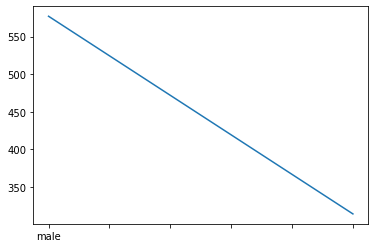

In [204]:
#membuat visualisasi sederhana di jupiter
nsex.plot()

# tapi gak cocok kalo line jadi diubah dulu

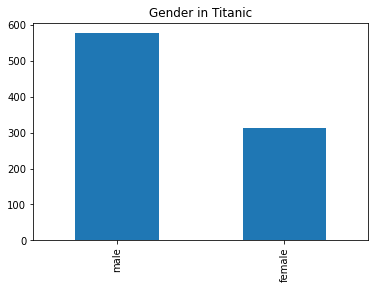

In [205]:
#dibuatnya menjadi bar chart
nsex.plot(kind = 'bar', title = 'Gender in Titanic')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

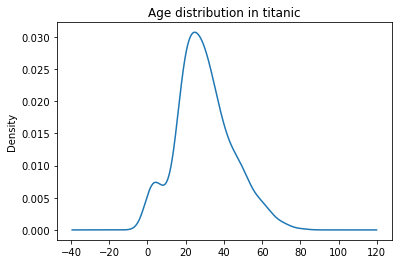

In [206]:
#membuat kde chart

age = titanic['Age']
display(age)

age.plot(kind = 'kde', title = 'Age distribution in titanic')

#yg sebelah kiri itu adalah gradient(kemiringan)
#kde = kernell density

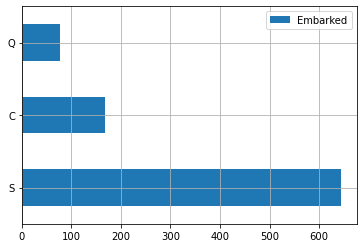

In [207]:
#membuat bar chart

embarked = titanic['Embarked'].value_counts()
embarked.plot(kind = 'barh', grid = True, legend = True)

## 2.24 pd.cut

In [208]:
##memberikan interval pada suatu value
#misal kolom umur, kan umurnya berbeda2 jadi kita bisa kelompokin dengan membuat interval
#contoh jadi interval kategori umur kid, adault,

#bins = jumlah kategori yg akan dibagi oleh pandas


#otomatis dibagi oleh pandas
age_bins1 = pd.cut(titanic['Age'], bins = 5)
age_bins1


0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888                 NaN
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [209]:
#mengecek pd.cut diatas dgn membuat dataframe
age_interval = pd.DataFrame({'age':titanic['Age'], 'bins':age_bins1})
age_interval

#arti kurung diawal dan kurung kotak dibelakang bins adalah yg nempel sama kurung kotak itu included,
#yg nempel sama kurung bisa gak include

,age,bins
0,22.0,"(16.336, 32.252]"
1,38.0,"(32.252, 48.168]"
2,26.0,"(16.336, 32.252]"
3,35.0,"(32.252, 48.168]"
4,35.0,"(32.252, 48.168]"
...,...,...
886,27.0,"(16.336, 32.252]"
887,19.0,"(16.336, 32.252]"
888,NaN,NaN
889,26.0,"(16.336, 32.252]"


In [210]:
#mengatur sendiri binsnya
age_bins2 = pd.cut(titanic['Age'], bins =[0,20,40,60,np.inf], labels = ['kids', 'teen', 'adault','veteran'])
age_bins2

0      teen
1      teen
2      teen
3      teen
4      teen
       ... 
886    teen
887    kids
888     NaN
889    teen
890    teen
Name: Age, Length: 891, dtype: category
Categories (4, object): [kids < teen < adault < veteran]

In [211]:
#mengecek nilai maksimal dari kolom age
age_interval[age_interval['age'] == age_interval['age'].max()]

,age,bins
630,80.0,"(64.084, 80.0]"


In [212]:
#memasukkan hasil interval yg telah dibuat (age_bins2) ke dalam kolom di df
titanic['Age_Cat']= age_bins2
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,teen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,teen
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,teen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,teen
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,teen
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,teen
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,kids
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,teen


#### #lanjutan describe

In [213]:
##kalo describenya kategorikal, resultnya begini
titanic['Name'].describe()

count                              891
unique                             891
top       Panula, Master. Eino Viljami
freq                                 1
Name: Name, dtype: object

In [214]:
titanic['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

## 2.25 pd.merge()

**Type of Merge**
- left: menggabungkan table berdasarkan index tabel yang di kiri, sama dengan SQL Query `left outer join`.
- right: menggabungkan table berdasarkan index table yang di kanan, sama dengan SQL Query `right outer join`.
- outer: menggabungkan table berdasarkan gabungan index dari kedua table, sama dengan SQL Query `full outer join`
- inner: menggabungkan table berdasarkan intersection index dari kedua table, sama dengan SQL Query `inner join`


In [215]:
kiri = pd.DataFrame({
    'kunci' : ['A', 'B', 'C', 'D'],
    'Jakarta': [1, 2, 3, 4],
    'BSD': [5, 6, 7, 8]
})

kanan = pd.DataFrame({
    'kunci' : ['A', 'B', 'C', 'D', 'E'],
    'Bekasi': [1, 2, 3, 4, 5],
    'Bandung': [5, 6, 7, 8, 9]
})


In [216]:
kiri

,kunci,Jakarta,BSD
0,A,1,5
1,B,2,6
2,C,3,7
3,D,4,8


In [217]:
kanan

,kunci,Bekasi,Bandung
0,A,1,5
1,B,2,6
2,C,3,7
3,D,4,8
4,E,5,9


In [218]:
#default on berdasarkan index
#kalo on itu berdasarkan kolom, tapi kolom yg sama di dua tabel
                        #left,right
ki_ka_inner = pd.merge(kiri,kanan, how = 'inner', on = 'kunci')
ki_ka_inner

,kunci,Jakarta,BSD,Bekasi,Bandung
0,A,1,5,1,5
1,B,2,6,2,6
2,C,3,7,3,7
3,D,4,8,4,8


In [219]:
ki_ka_outer = pd.merge(kiri,kanan, how = 'outer', on = 'kunci')
ki_ka_outer

,kunci,Jakarta,BSD,Bekasi,Bandung
0,A,1.0,5.0,1,5
1,B,2.0,6.0,2,6
2,C,3.0,7.0,3,7
3,D,4.0,8.0,4,8
4,E,NaN,NaN,5,9


In [220]:
ki_ka_outer = pd.merge(kiri,kanan, how = 'right', on = 'kunci')
ki_ka_outer

,kunci,Jakarta,BSD,Bekasi,Bandung
0,A,1.0,5.0,1,5
1,B,2.0,6.0,2,6
2,C,3.0,7.0,3,7
3,D,4.0,8.0,4,8
4,E,NaN,NaN,5,9


In [221]:
##tetep nurut yg dikanan karena hownya, walopun kiri udh digeser ke kiri
ka_ki_outer = pd.merge(kanan,kiri, how = 'right', on = 'kunci')
ka_ki_outer

,kunci,Bekasi,Bandung,Jakarta,BSD
0,A,1,5,1,5
1,B,2,6,2,6
2,C,3,7,3,7
3,D,4,8,4,8


## 2.26 df.join()

In [222]:
Budi = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                   index = ['K0', 'K1', 'K2'])

Andi = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                     'D': ['D0', 'D2', 'D3']},
                   index = ['K0', 'K2', 'K3'])


In [223]:
Budi

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [224]:
Andi

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [225]:
#table left(Budi) bergabung dengan right table (Andi) dan .....
Budi.join(Andi)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [226]:
Andi.join(Budi)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [227]:
#jadi tetep mengikuti kanan
Andi.join(Budi, how = 'right')

,C,D,A,B
K0,C0,D0,A0,B0
K1,NaN,NaN,A1,B1
K2,C2,D2,A2,B2


## 2.28 df.pivot()

In [228]:
df_dummy = pd.DataFrame([
    {'test':1, 'nama':'Andi', 'fisika':90, 'biologi':78},
    {'test':2, 'nama':'Andi', 'fisika':95, 'biologi':80},
    {'test':3, 'nama':'Andi', 'fisika':90, 'biologi':82},
    {'test':1, 'nama':'Budi', 'fisika':80, 'biologi':80},
    {'test':2, 'nama':'Budi', 'fisika':85, 'biologi':89},
    {'test':3, 'nama':'Budi', 'fisika':72, 'biologi':75},])
df_dummy

,test,nama,fisika,biologi
0,1,Andi,90,78
1,2,Andi,95,80
2,3,Andi,90,82
3,1,Budi,80,80
4,2,Budi,85,89
5,3,Budi,72,75


In [229]:
#kolomnya jadi multilevel
df_dummy_pivot = df_dummy.pivot(index = 'test', columns = 'nama')
df_dummy_pivot

fisika      biologi     
nama   Andi Budi    Andi Budi
test                         
1        90   80      78   80
2        95   85      80   89
3        90   72      82   75

In [232]:
#mengecek kolom yg di df yg telah di pivot
df_dummy_pivot.columns

MultiIndex([( 'fisika', 'Andi'),
            ( 'fisika', 'Budi'),
            ('biologi', 'Andi'),
            ('biologi', 'Budi')],
           names=[None, 'nama'])

In [231]:
df_dummy_pivot1 = df_dummy.pivot(index = 'nama', columns = 'test')
df_dummy_pivot1

fisika         biologi        
test      1   2   3       1   2   3
nama                               
Andi     90  95  90      78  80  82
Budi     80  85  72      80  89  75